In [1]:
# Load basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
train = pd.read_excel('./Data_Train.xlsx')
train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
...,...,...,...,...,...,...,...,...,...
5694,Who Ordered This Truckload of Dung?: Inspiring...,Ajahn Brahm,"Paperback,– 30 Aug 2005",4.9 out of 5 stars,9 customer reviews,“Laugh your way to enlightenment” with this in...,Buddhism (Books),Humour,1009.00
5695,PostCapitalism: A Guide to Our Future,Paul Mason,"Paperback,– 2 Jun 2016",4.1 out of 5 stars,2 customer reviews,'The most important book about our economy and...,Macroeconomics Textbooks,Politics,781.00
5696,The Great Zoo Of China,Matthew Reilly,"Paperback,– 14 Jan 2016",4.1 out of 5 stars,28 customer reviews,The Chinese government has been keeping a secr...,Action & Adventure (Books),"Crime, Thriller & Mystery",449.00
5697,Engleby,Sebastian Faulks,"Paperback,– 27 Mar 2008",1.0 out of 5 stars,1 customer review,Mike Engleby has a secret...\n\nThis is the st...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",108.00


In [4]:
test = pd.read_excel('./test.xlsx', index_col=0)
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography"
1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography"
2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery"
3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Political Ideologies (Books),Politics
4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports


In [5]:
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (5699, 9)
Test shape:  (537, 8)


In [6]:
train.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [7]:
test.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

## Univariate Variable Analysis



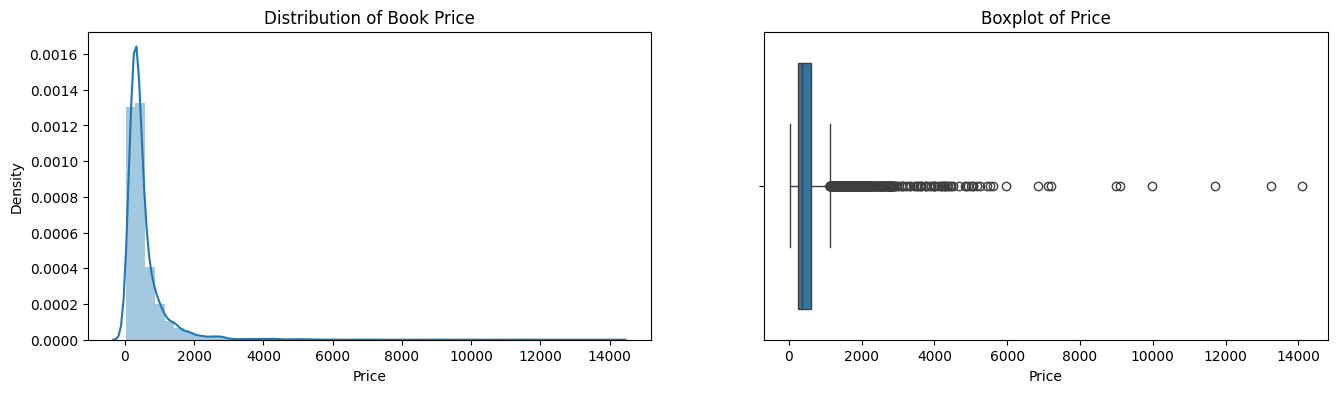

In [8]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(train['Price'])
plt.title("Distribution of Book Price")
plt.subplot(1,2, 2)
sns.boxplot(train['Price'], orient='h')
plt.title("Boxplot of Price")
plt.show()

Skewed!

In [9]:
log_train = train.copy(deep=True)

In [10]:
log_train['Price'] = np.log(log_train['Price'])

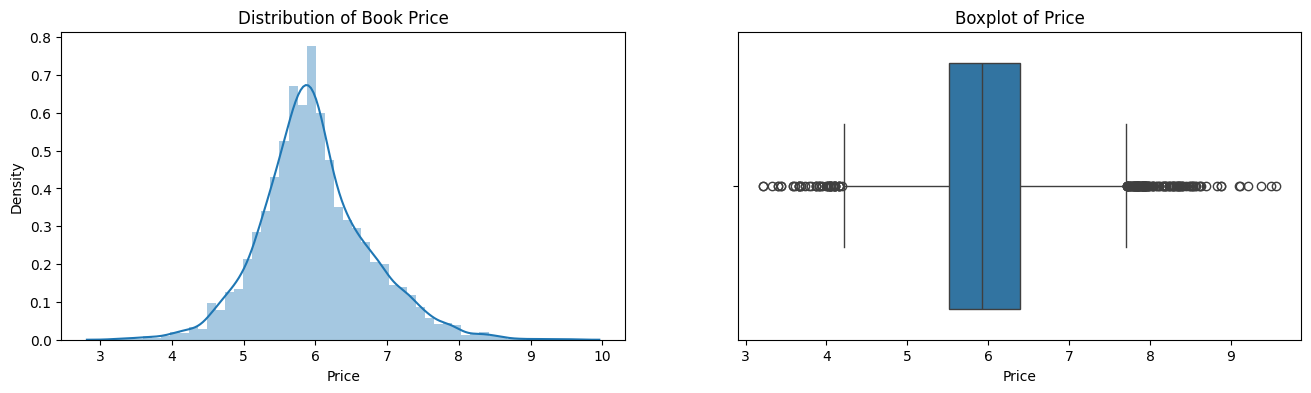

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(log_train['Price'])
plt.title("Distribution of Book Price")
plt.subplot(1,2, 2)
sns.boxplot(log_train['Price'], orient='h')
plt.title("Boxplot of Price")
plt.show()

In [12]:
# def remove_column_outliers(df, column_name, threshold=3):
#     # Extract the column data as a NumPy array
#     data = df[column_name].values
    
#     # Calculate the mean and standard deviation
#     mean = np.mean(data)
#     std = np.std(data)
    
#     # Calculate the Z-scores for each data point
#     z_scores = (data - mean) / std
    
#     # Identify the outliers based on the threshold
#     outliers = np.abs(z_scores) > threshold
    
#     # Remove the outliers from the DataFrame
#     cleaned_df = df[~outliers]
    
#     return cleaned_df.reset_index(drop=True)

In [13]:
# cleaned_train = remove_column_outliers(log_train, 'Price')

In [14]:
# sns.boxplot(cleaned_train['Price'], orient='h')
# plt.title("Boxplot of Price")
# plt.show()

## Basic Data Analysis



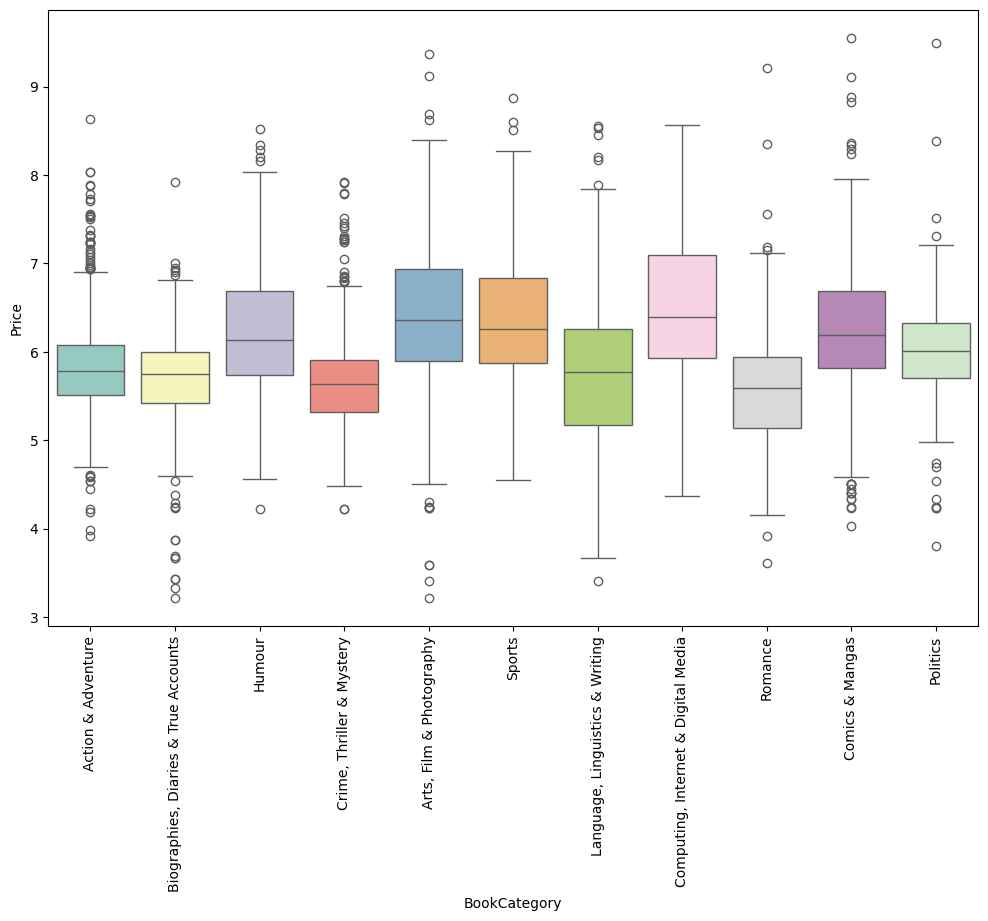

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=log_train, x='BookCategory', y='Price', palette='Set3')
plt.xticks(rotation=90)
plt.show()


## Feature Engineering



In [42]:
log_train.shape

(5699, 9)

In [43]:
df = pd.concat([log_train, test])
df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,5.393628
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",5.312861
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,5.700444
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",5.192957
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",6.872770
...,...,...,...,...,...,...,...,...,...
532,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,NaN
533,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",NaN
534,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,NaN
535,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,NaN


In [44]:
df.rename(columns={
    'Reviews': 'Ratings',
    'Ratings': 'Reviews'
}, inplace=True)

df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,5.393628
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",5.312861
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,5.700444
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",5.192957
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",6.872770


In [45]:
df['Ratings'] = df.Ratings.apply(lambda x: float(x.split()[0]))

In [46]:
df['Reviews'] = df.Reviews.apply(lambda x: int(x.split()[0].replace(',', '')))

In [47]:
df['RatingPerReview'] = round(df['Ratings']/ df['Reviews'], 2) # Ratings and Reviews Ratio

<Axes: xlabel='RatingPerReview', ylabel='Price'>

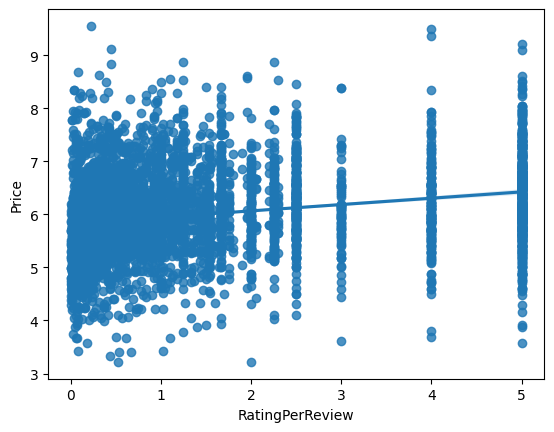

In [48]:
sns.regplot(data=df, x='RatingPerReview', y='Price')

Sounds like **not** a useful predictor!

In [24]:
# Number of Books from an Author
df['Author_Books_num'] = df['Author'].map(df.groupby('Author',sort=False)['Title'].apply(lambda x: len(x.unique())).to_dict())

In [25]:
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,RatingPerReview,Author_Books_num
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,5.393628,0.50,4
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",5.312861,0.28,1
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,5.700444,0.80,1
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",5.192957,0.32,65
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",6.872770,5.00,1


In [26]:
df['Year'] = df['Edition'].apply(lambda x: x.split()[-1])
df['Edition_Type']=df['Edition'].apply(lambda x: x.split(',– ')[0])
df.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,RatingPerReview,Author_Books_num,Year,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,5.393628,0.50,4,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",5.312861,0.28,1,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,5.700444,0.80,1,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",5.192957,0.32,65,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",6.872770,5.00,1,2006,Hardcover


In [27]:
df['Year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'Import', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', '1980', 'Unabridged', '1979', 'Print',
       '1960', '1970', '1975', '1905', '1900', 'Audiobook', '1961',
       '1925', '1973'], dtype=object)

In [28]:
test['Edition'].apply(lambda x: x.split()[-1]).unique()

array(['2003', '2015', '2016', '2011', '2010', '1977', '2012', '2007',
       '2017', '2018', '2019', '2014', '2002', '2013', '1990', '1989',
       '2009', '2005', '1984', '2000', '1980', '2004', '1986', '1985',
       '1999', '2008', '1992', '2001', '1995', '1979', '1993', 'Print',
       '1994', '1996', '1997', '1982', '1978', '2006', '1987', '1998'],
      dtype=object)

In [29]:
not_year = ['Import', 'NTSC', 'Facsimile', 'set', 'Edition', 'Unabridged', 'Print', 'Audiobook']

In [30]:
df[df['Year'].isin(not_year)]

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,RatingPerReview,Author_Books_num,Year,Edition_Type
169,Long Walk to Freedom: Illustrated Children's e...,Nelson Mandela,"Paperback,– Abridged, Import",5.0,2,Long Walk to Freedom by Nelson Mandela is the ...,Action & Adventure (Books),Action & Adventure,6.035481,2.50,1,Import,Paperback
235,Alfred's Basic Adult All-in-One Course: Lesson...,Willard A. Palmer,"Plastic Comb,– DVD, NTSC",3.9,6,Alfred's Basic Adult All-in-One Course is a gr...,Music Books,"Arts, Film & Photography",7.281386,0.65,1,NTSC,Plastic Comb
582,Fundamentals of Drawing Portraits: A Practical...,Barrington Barber,"Paperback,– Illustrated, Import",4.0,7,This book is essential for everyone who wants ...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",6.028279,0.57,1,Import,Paperback
972,"Cartooning, The Professional Step-by-Step Guid...","Ivan Hissey, Curtis Tappenden","Paperback,– Illustrated, Import",3.0,1,A comprehensive and practical guide to drawing...,"Handicrafts, Decorative Arts & Crafts (Books)",Comics & Mangas,6.098074,3.00,1,Import,Paperback
1233,Amma Tell Me About Raksha Bandhan!,Bhakti Mathur,"Paperback,– Large Print, Import",5.0,1,A promise to love and to protect\nIs sealed by...,Action & Adventure (Books),Action & Adventure,5.624018,5.00,6,Import,Paperback
1558,Figure it out for Yourself,James Hadley Chase,"Hardcover,– Import, Facsimile",5.0,1,Serena Marshland was the fourth richest woman ...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",4.605170,5.00,1,Facsimile,Hardcover
1605,"An Introduction to Linguistics: Language, Gram...",Syal,"Paperback,– Abridged, Audiobook, Box set",4.1,29,"This compact and engagingly elegant text, now ...",Engineering,"Language, Linguistics & Writing",5.988961,0.14,1,set,Paperback
1631,Swimming: Swimming Made Easy: Beginner and Exp...,Ace McCloud,"Paperback,– Large Print, Import",4.0,1,Are you tired of being a weak swimmer? Do less...,"Swimming, Snorkelling & Diving (Books)",Sports,6.563856,4.00,1,Import,Paperback
1643,The Merchant of Venice (Text with Paraphrase) ...,William Shakespeare,"Paperback,– Student Edition, Special Edition",3.9,58,Introduce the students to William Shakespeare’...,Theater,"Arts, Film & Photography",5.393628,0.07,5,Edition,Paperback
1769,The Human Face of Big Data,Rick Smolan,"Hardcover,– Abridged, Audiobook, Box set",5.0,1,The images and stories captured in The Human F...,Computer Science Books,"Computing, Internet & Digital Media",7.717796,5.00,1,set,Hardcover


In [31]:
df['Year'].value_counts()

2018          810
2017          757
2016          659
2015          519
2014          402
             ... 
Unabridged      1
Edition         1
Facsimile       1
NTSC            1
1973            1
Name: Year, Length: 64, dtype: int64

In [32]:
df['Year'] = df['Year'].replace(not_year, np.nan)

df['Year'] = df['Year'].fillna(2018)

In [33]:
df1 = df.copy(deep=True)

In [34]:
df1['Year'] = df1['Year'].astype(int)
df1['Book_Age'] = 2023 - df1['Year']

In [35]:
df1['Edition_Type'].value_counts()

Paperback                5192
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Library Binding             1
(French),Paperback          1
Leather Bound               1
(German),Paperback          1
Board book                  1
Product Bundle              1
(Kannada),Paperback         1
Perfect Paperback           1
Plastic Comb                1
(Spanish),Paperback         1
Name: Edition_Type, dtype: int64

In [36]:
df1['Edition_Type'] = df1['Edition_Type'].replace({
    '(French),Paperback': 'Paperback',
    '(German),Paperback': 'Paperback',
    '(Kannada),Paperback': 'Paperback',
    'Perfect Paperback': 'Paperback',
    '(Spanish),Paperback': 'Paperback'
})

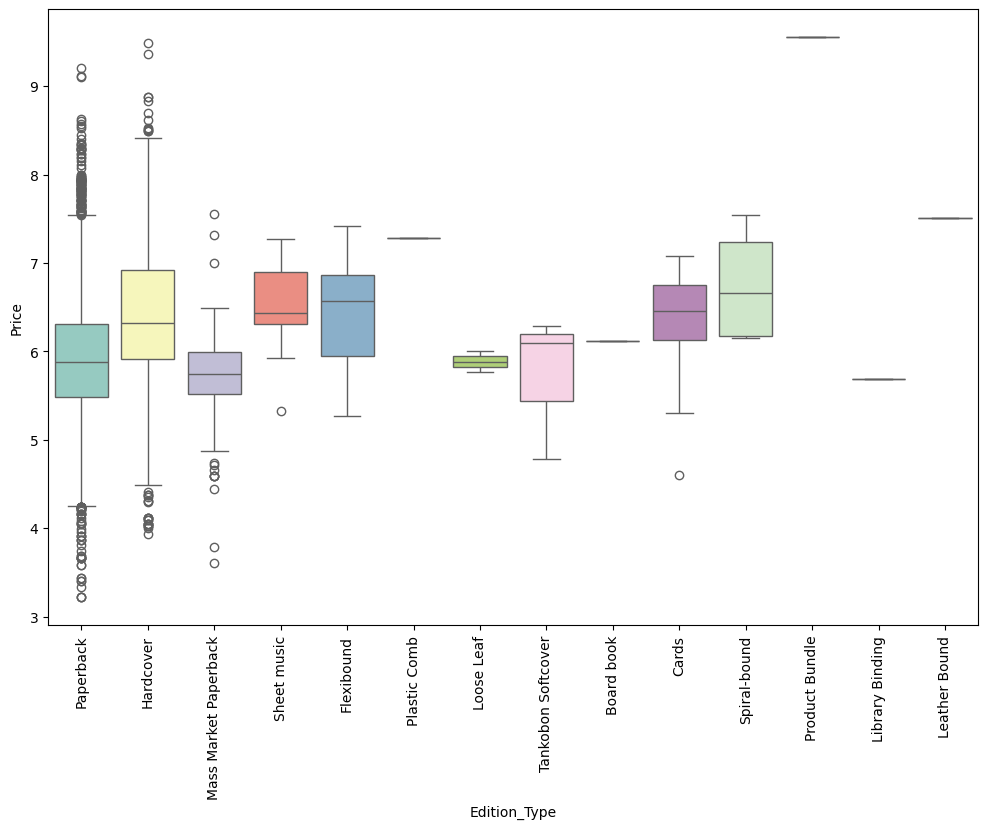

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, x='Edition_Type', y='Price', palette='Set3')
plt.xticks(rotation=90)
plt.show()

In [146]:
object_cols = df1.select_dtypes(include='object').columns.to_list()

object_nunique = list(map(lambda col: df1[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('BookCategory', 11),
 ('Edition_Type', 14),
 ('Genre', 345),
 ('Edition', 3370),
 ('Author', 3678),
 ('Synopsis', 5548),
 ('Title', 5567)]

In [211]:
df2 = df1.drop(columns=['Title', 'Author', 'Edition', 'Synopsis'], axis=1)

In [213]:
df3 = pd.get_dummies(df2, columns= ['BookCategory'])

In [214]:
for col in ['Edition_Type', 'Genre']:
    df3[col] = LabelEncoder().fit_transform(df3[col])

In [215]:
df3.head()

,Ratings,Reviews,Genre,Price,RatingPerReview,Author_Books_num,Year,Edition_Type,Book_Age,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,4.0,8,1,5.393628,0.50,4,2016,8,7,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14,74,5.312861,0.28,1,2012,8,11,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6,193,5.700444,0.80,1,1982,8,41,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13,92,5.192957,0.32,65,2017,8,6,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1,253,6.872770,5.00,1,2006,3,17,0,1,0,0,0,0,0,0,0,0,0


## Modeling

In [216]:
train = df3[df3['Price'].notna()]
X = train.drop('Price', axis=1)
y = train['Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

test = df3[df3['Price'].isnull()]
X_test = test.drop('Price', axis=1)

In [217]:
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (5129, 19)
X_val shape:  (570, 19)
X_test shape:  (537, 19)


In [218]:
random_forest_regressor = RandomForestRegressor(criterion='squared_error')
random_forest_regressor.fit(X_train, y_train)

y_pred_train = random_forest_regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

y_pred_val = random_forest_regressor.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)

In [220]:
print("Train mse is: {} and Validation mse is: {}".format(mse_train,mse_val))

Train mse is: 0.05600316840343516 and Validation mse is: 0.31856821100649957


In [221]:
y_pred_test = random_forest_regressor.predict(X_test)

In [222]:
y_pred_test_df = pd.DataFrame(np.exp(y_pred_test), columns=['Price'])

In [223]:
y_pred_test_df

,Price
0,534.555412
1,575.820715
2,273.234130
3,287.379321
4,643.694867
...,...
532,505.981694
533,242.770490
534,327.493658
535,259.648199


In [224]:
y_pred_test_df = y_pred_test_df.reset_index()
y_pred_test_df

,index,Price
0,0,534.555412
1,1,575.820715
2,2,273.234130
3,3,287.379321
4,4,643.694867
...,...,...
532,532,505.981694
533,533,242.770490
534,534,327.493658
535,535,259.648199


In [225]:
y_pred_test_df.to_csv('output17.csv', index=False)